# 와인품질데이터

In [54]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

import graphviz
from sklearn.tree import export_graphviz

In [55]:
plt.rcParams['font.family'] = 'AppleGothic'

In [56]:
wine = pd.read_csv('/Users/hayeon/Downloads/2021-2(3-2)/머신러닝/data/winequality-red.csv')

# 데이터 전처리 
#### 3, 4, 5 = 0 / 6, 7, 8 = 1

In [57]:
wine.quality.replace({3:0, 4:0, 5:0, 6:1, 7:1, 8:1}, inplace=True)

In [58]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# 데이터 분리

In [59]:
X = wine.drop(['quality'], axis=1)
y = wine[['quality']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# DecisionTree 
### max_depth 변화에 따른 정확도의 변화

>1 accuracy: 0.68
>2 accuracy: 0.68
>3 accuracy: 0.70
>4 accuracy: 0.73
>5 accuracy: 0.73
>6 accuracy: 0.70
>7 accuracy: 0.74
>8 accuracy: 0.72
>9 accuracy: 0.74
>10 accuracy: 0.73
>11 accuracy: 0.73
>12 accuracy: 0.77
>13 accuracy: 0.77
>14 accuracy: 0.77
>15 accuracy: 0.78
>16 accuracy: 0.79
>17 accuracy: 0.79
>18 accuracy: 0.79
>19 accuracy: 0.78


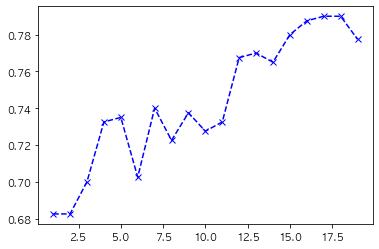

In [67]:
acc = []
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=0)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    acc.append(ac)
    print('>%d accuracy: %.2f'%(i, ac))
plt.plot(range(1,20), acc, '--xb')

#### max_depth = 8일 때의 정확도가 가장 높기 때문에 max_depth = 18로 설정 후 재학습

In [68]:
dt = DecisionTreeClassifier(max_depth=18)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred_dt)
pre = precision_score(y_test, y_pred_dt)
rec = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print('acc: %.2f'%acc)
print('pre: %.2f'%pre)
print('rec: %.2f'%rec)
print('f1: %.2f'%f1)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

acc: 0.79
pre: 0.79
rec: 0.82
f1: 0.80
[[148  46]
 [ 38 168]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       194
           1       0.79      0.82      0.80       206

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



### 직접 계산해보기.
* accuracy : 맞춘 수 / 전체 수
* precision : 모델관점. 정답으로 예측한 것 중 정답인 것 
* recall : 정답관점. 실제 정답인 것 중 모델이 정답으로 예측한 것 
* f1 : 2 * ((precision * recall) / (precision + recall))

In [69]:
accuracy = (148+168)/(148+168+46+38)
precision = 148 / (148+38)
recall = 148 / (148 + 46)
f1 = 2 * ((precision * recall) / (precision + recall))

print('accuracy: %.2f'%accuracy)
print('precision: %.2f'%precision)
print('recall: %.2f'%recall)
print('f1: %.2f'%f1)

accuracy: 0.79
precision: 0.80
recall: 0.76
f1: 0.78


# RandomForest
### n_estimators 변화에 따른 정확도의 변화

>10 accuracy: 0.78
>60 accuracy: 0.81
>110 accuracy: 0.81
>160 accuracy: 0.82
>210 accuracy: 0.82
>260 accuracy: 0.82
>310 accuracy: 0.82
>360 accuracy: 0.82
>410 accuracy: 0.81
>460 accuracy: 0.82
>510 accuracy: 0.83
>560 accuracy: 0.83
>610 accuracy: 0.83
>660 accuracy: 0.83


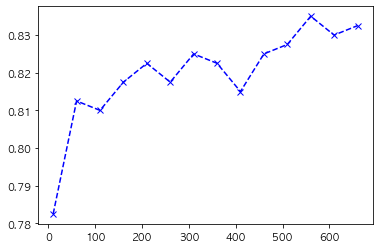

In [70]:
acc = []
for i in range(10, 700, 50):
    rf = RandomForestClassifier(n_estimators=i, random_state=0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    acc.append(ac)
    print('>%d accuracy: %.2f'%(i, ac))
plt.plot(range(10, 700, 50), acc, '--xb')

### n_estimators =  560일 때의 정확도가 가장 높다고 판단, 해당 값을 넣어 재학습

In [71]:
rf = RandomForestClassifier(n_estimators=560)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred_rf)
pre = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print('accuracy: %.2f'%acc)
print('precision: %.2f'%pre)
print('recall: %.2f'%rec)
print('f1: %.2f'%f1)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

accuracy: 0.83
precision: 0.83
recall: 0.85
f1: 0.84
[[158  36]
 [ 31 175]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       194
           1       0.83      0.85      0.84       206

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



### 직접 계산해보기.

In [72]:
accuracy = (156+175)/(158+175+36+31)
precision = 156 / (156+31)
recall = 156 / (156 + 36)
f1 = 2 * ((precision * recall) / (precision + recall))

print('accuracy: %.2f'%accuracy)
print('precision: %.2f'%precision)
print('recall: %.2f'%recall)
print('f1: %.2f'%f1)

accuracy: 0.83
precision: 0.83
recall: 0.81
f1: 0.82


# ROC , AUC
### roc : FP비율을 X축, TP비율을 Y축으로 하는 그래프 
### auc : ROC 곡선을 정량적으로 평가하기 위해 ROC 곡선 아래의 면적을 수치화한 값.
###  -> **클래스를 분류할 수 있는 확률을 나타낸다.**

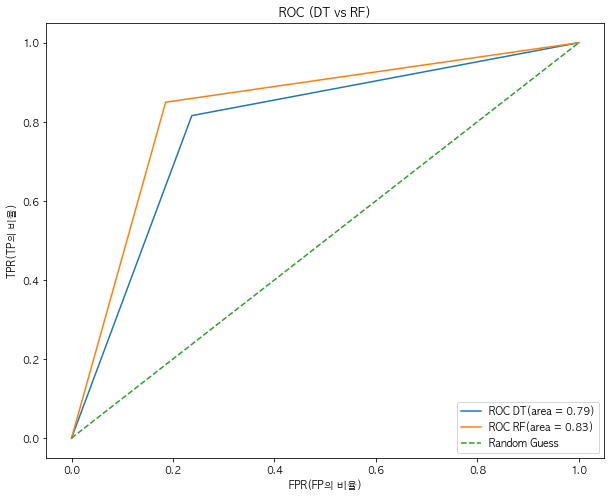

In [73]:
fpr1, tpr1, ther1 = roc_curve(y_test, y_pred_dt)
fpr2, tpr2, ther2 = roc_curve(y_test, y_pred_rf)
auc_dt = auc(fpr1, tpr1)
auc_rf = auc(fpr2, tpr2)

plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label='ROC DT(area = %.2f)'%auc_dt)
plt.plot(fpr2, tpr2, label='ROC RF(area = %.2f)'%auc_rf)
plt.plot([0,1],[0,1], '--', label='Random Guess')
plt.title('ROC (DT vs RF)')
plt.xlabel('FPR(FP의 비율)')
plt.ylabel('TPR(TP의 비율)')
plt.legend(loc='lower right')
plt.show()

> ### 랜덤포레스트가 의사결정나무에 비해 클래스를 분류할 확률이 더 높다. (auc 79% < 83%)